In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv(r'GermanCredit.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [45]:
df.drop(columns=['other_parties','other_payment_plans','residence_since'], inplace=True)

In [46]:
df.replace('\'','', regex=True, inplace=True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,real estate,67,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,life insurance,45,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,no known property,53,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,real estate,31,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,car,38,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,no known property,23,for free,1,skilled,1,yes,yes,bad


In [47]:
df.loc[(df['checking_status'] == 'no checking'), 'checking_status'] = 'No Checking'
df.loc[(df['checking_status'] == '<0'), 'checking_status'] = 'Low'
df.loc[(df['checking_status'] == '0<=X<200'), 'checking_status'] = 'Medium'
df.loc[(df['checking_status'] == '>=200'), 'checking_status'] = 'High'
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,real estate,67,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,life insurance,45,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,no known property,53,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,real estate,31,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,car,38,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,no known property,23,for free,1,skilled,1,yes,yes,bad


In [48]:
df.loc[(df['savings_status'] == 'no known savings'), 'savings_status'] = 'No Savings'
df.loc[(df['savings_status'] == '<100'), 'savings_status'] = 'Low'
df.loc[(df['savings_status'] == '100<=X<500'), 'savings_status'] = 'Medium'
df.loc[(df['savings_status'] == '500<=X<1000'), 'savings_status'] = 'High'
df.loc[(df['savings_status'] == '>=1000'), 'savings_status'] = 'High'
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,real estate,67,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,life insurance,45,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,no known property,53,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,real estate,31,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,car,38,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,no known property,23,for free,1,skilled,1,yes,yes,bad


In [49]:
df.loc[(df['class'] == 'good'), 'class'] = '1'
df.loc[(df['class'] == 'bad'), 'class'] = '0'
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,real estate,67,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,life insurance,45,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,no known property,53,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,real estate,31,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,car,38,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,no known property,23,for free,1,skilled,1,yes,yes,0


In [50]:
df.loc[(df['employment'] == 'unemployed'), 'employment'] = 'Unemployed'
df.loc[(df['employment'] == '<1'), 'employment'] = 'Amateur'
df.loc[(df['employment'] == '1<=X<4'), 'employment'] = 'Professional'
df.loc[(df['employment'] == '4<=X<7'), 'employment'] = 'Experienced'
df.loc[(df['employment'] == '>=7'), 'employment'] = 'Expert'
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,real estate,67,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,life insurance,45,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,no known property,53,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,real estate,31,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,car,38,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,no known property,23,for free,1,skilled,1,yes,yes,0


In [51]:
pd.crosstab(df['foreign_worker'], df['class'])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


In [52]:
pd.crosstab(df['employment'], df['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [53]:
employment = df.loc[df['employment']=='Experienced']

male = employment.loc[employment['personal_status']=='male single']

male['credit_amount'].mean()

4142.592592592592

In [54]:
df.groupby('job')['duration'].mean()

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

In [55]:
education = df.loc[df['purpose']=='education']

status = education['checking_status'].value_counts().head(1)
print('The most common checking status: ',status)

savings = education['savings_status'].value_counts().head(1)
print('The most common savings status: ',savings)

The most common checking status:  No Checking    20
Name: checking_status, dtype: int64
The most common savings status:  Low    30
Name: savings_status, dtype: int64


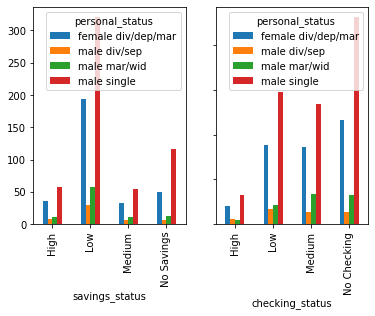

In [60]:
fig, axs = plt.subplots(1, 2)

pd.crosstab(df['savings_status'], df['personal_status']).plot(kind='bar', ax = axs[0])
pd.crosstab(df['checking_status'], df['personal_status']).plot(kind='bar', ax = axs[1])

for ax in axs.flat:
    ax.label_outer()

<AxesSubplot:title={'center':'Property Magnitude vs Average Age (Credit > 4000)'}, xlabel='Property Magnitude', ylabel='Age'>

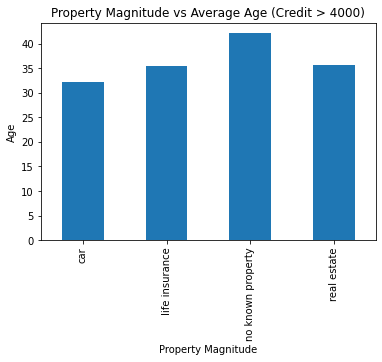

In [68]:
filter = df[df['credit_amount'] > 4000]

filter.groupby('property_magnitude')['age'].mean().plot(kind='bar', title='Property Magnitude vs Average Age (Credit > 4000)', 
ylabel='Age', xlabel='Property Magnitude')

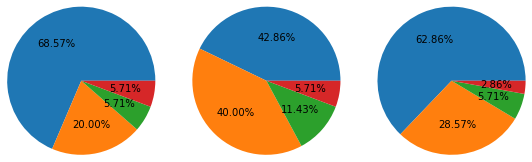

In [67]:
filter = df[(df['savings_status'] == 'High') & (df['age'] > 40)]

fig, axs = plt.subplots(1, 3)

axs[0].pie(filter['personal_status'].value_counts(), autopct='%1.2f%%', radius=3)
axs[1].pie(filter['credit_history'].value_counts(), autopct='%1.2f%%', radius=3)
axs[2].pie(filter['job'].value_counts(), autopct='%1.2f%%', radius=3)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=2, wspace=2, hspace=2)